In [48]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
faces.data.shape # (400,4096)
range(len(faces.data))
klist=np.random.choice(range(len(faces.data)),10)

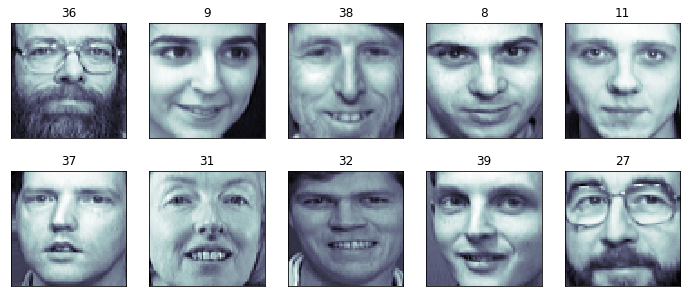

In [51]:
fig=plt.figure(figsize=(12,5))
# 2줄, 5칸 나누어얼굴 이미지(klist) 출력
for i in range(2):
    for j in range(5):
        k=klist[i*5+j]
        ax=fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(faces.images[k],cmap=plt.cm.bone)
        plt.title(faces.target[k])
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [53]:
from sklearn.svm import SVC
model=SVC(kernel='linear').fit(xtrain, ytrain)

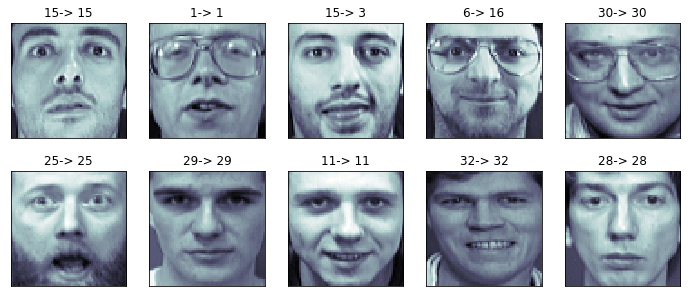

In [76]:
fig=plt.figure(figsize=(12,5))
# 2줄, 5칸 나누어얼굴 이미지(klist) 출력

klist=np.random.choice(range(len(ytest)),10)

for i in range(2):
    for j in range(5):
        k=klist[i*5+j]
        ax=fig.add_subplot(2, 5, i*5+j+1)
        ax.imshow(xtest[k:(k+1),:].reshape(64,64),cmap=plt.cm.bone)
        plt.title("%d-> %d" % (ytest[k], model.predict(xtest[k:(k+1):])))
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])
plt.show()

In [86]:
from sklearn.metrics import classification_report, accuracy_score
# scikit-learn.org
ypredtrain=model.predict(xtrain) # 의미가 없는 데이터
xpredtest=model.predict(xtest)

In [89]:
print(classification_report(ytrain, ypredtrain))
len(ytrain)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

240

In [88]:
print(classification_report(ytest, xpredtest))
len(ytrain)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

240

In [90]:
# confusion matrix(분류 평가표) : 실제와 예측이 일치하는 개수
# 행-정답, 열-예측
from sklearn.metrics import confusion_matrix
xtrue=[2,0,2,2,0,1] # 정답
xpred=[0,0,2,2,0,2] # 예측값
confusion_matrix(xtrue, xpred)
# 행-> 정답, 열-> 예측, 

# array([[2, 0, 0],   2: 정답 0, 예측 0
#        [0, 0, 1],   1: 정답 1, 예측 2
#        [1, 0, 2]],  1: 정답 2, 예측 0  // 2: 정답 2, 예측도 2가 2건 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [94]:
# 양성 1, 음성 0
xtrue=[1,0,1,1,0,1]
ypred=[0,0,1,1,0,1]
confusion_matrix(xtrue, ypred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [95]:
confusion_matrix(xtrue, ypred, labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [98]:
xtrue=[0,0,0,1,1,0,0]
xpred=[0,0,0,0,1,1,1]
print(classification_report(xtrue, xpred))
"""
0이라고 예측한 데이터의 75%만 실제로 0이었다.
1이라고 예측한 데이터의 33%만 실제로 1이었다.
실제 0인 데이터 중 60%만 0으로 판별이 됨
실베 1인 데이터 중 50%만 1로 판별이 됨

"""

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [ ]:
# sigmoid, relu, stepfunction

In [101]:
from math import exp

def mySigmoid(x):
    return 1/(1+exp(-x))

def myReLu(x):
    if x>0:
        return x
    else:
        return 0
    
def myStepFunction(x):
    if x>0:
        return 1
    else:
        return 0

In [106]:
print(mySigmoid(-5))
print(myReLu(-1))
print(myStepFunction(3))

0.0066928509242848554
0
1


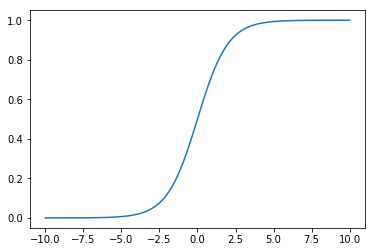

In [119]:
def sigmo(x):   
    a = []  
    for itr in x:  
        a.append(1/(1+exp(-itr)))
    return a 

x = np.linspace(-10, 10, 100) 
sig = sigmo(x)

plt.plot(x, sig)
plt.show()